In [27]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

line_names = ['Red', 'Blue', 'Green', 'Brown',  'Purple', 'Purple Express', 'Yellow', 'Pink', 'Orange' ]

In [28]:
L_data = pd.read_csv('../merging/L_data_merged.csv', low_memory = False)

In [29]:
L_data = L_data.drop(['daytype','Location', 'Neighborhood', 'City'], axis = 1)

L_data['date'] = pd.to_datetime(L_data['date'], infer_datetime_format=True)

L_data = L_data.rename(columns = {'RED': 'Red', 'BLUE':'Blue', 'G':'Green', 'BRN':'Brown',  'P':'Purple', 'Pexp':'Purple Express', 'Y': 'Yellow', 'Pnk':'Pink', 'O':'Orange'})

In [30]:
L_data

,date,rides,Station Name,Red,Blue,Green,Brown,Purple,Purple Express,Yellow,Pink,Orange
0,2004-10-09,1057,Harold Washington Library-State/Van Buren (Bro...,False,False,False,True,False,True,False,True,True
1,2010-06-18,1154,Central Park (Pink Line),False,False,False,False,False,False,False,True,False
2,2001-10-30,2116,Montrose (Brown Line),False,False,False,True,False,False,False,False,False
3,2006-10-26,0,Washington/State (Closed),True,False,False,False,False,False,False,False,False
4,2010-07-07,9431,Monroe (Red Line),True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1006156,2020-04-26,419,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,True,True
1006157,2020-04-27,883,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,True,True
1006158,2020-04-28,880,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,True,True
1006159,2020-04-29,768,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,True,True


In [31]:
L_data['number of lines'] = L_data[line_names].astype(int).sum(axis = 1)

In [32]:
L_data

,date,rides,Station Name,Red,Blue,Green,Brown,Purple,Purple Express,Yellow,Pink,Orange,number of lines
0,2004-10-09,1057,Harold Washington Library-State/Van Buren (Bro...,False,False,False,True,False,True,False,True,True,4
1,2010-06-18,1154,Central Park (Pink Line),False,False,False,False,False,False,False,True,False,1
2,2001-10-30,2116,Montrose (Brown Line),False,False,False,True,False,False,False,False,False,1
3,2006-10-26,0,Washington/State (Closed),True,False,False,False,False,False,False,False,False,1
4,2010-07-07,9431,Monroe (Red Line),True,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006156,2020-04-26,419,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,True,True,5
1006157,2020-04-27,883,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,True,True,5
1006158,2020-04-28,880,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,True,True,5
1006159,2020-04-29,768,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,True,True,5


In [33]:
for line in line_names:
    label_1 = line+'_frac'
    label_2 = line +'_prob'
    L_data[label_2]= 1 / L_data['number of lines'] * L_data[line].astype(int)
    L_data[label_1]= L_data['rides'] * L_data[label_2]

In [34]:
L_data['number of lines']

0          4
1          1
2          1
3          1
4          1
          ..
1006156    5
1006157    5
1006158    5
1006159    5
1006160    5
Name: number of lines, Length: 1006161, dtype: int64

In [35]:
agg_method={'rides':'sum'}
for line in line_names:
    key = line+'_frac'
    agg_method[key] = 'sum'

agg_method

{'rides': 'sum',
 'Red_frac': 'sum',
 'Blue_frac': 'sum',
 'Green_frac': 'sum',
 'Brown_frac': 'sum',
 'Purple_frac': 'sum',
 'Purple Express_frac': 'sum',
 'Yellow_frac': 'sum',
 'Pink_frac': 'sum',
 'Orange_frac': 'sum'}

In [36]:
Line_data_1 = L_data.groupby('date').agg(agg_method)

In [15]:
Line_data_1['rides']

date
2001-01-01    105608
2001-01-02    419202
2001-01-03    447997
2001-01-04    459338
2001-01-05    465940
               ...  
2020-04-26     38851
2020-04-27     63538
2020-04-28     64725
2020-04-29     61181
2020-04-30     65133
Name: rides, Length: 7060, dtype: int64

In [37]:
Line_data_1 = Line_data_1[[line + '_frac' for line in line_names]].reset_index()

In [38]:
rename_dict ={}

for line in line_names:
    key = line + '_frac'
    rename_dict[key] = line +'_weight'

In [39]:
rename_dict

{'Red_frac': 'Red_weight',
 'Blue_frac': 'Blue_weight',
 'Green_frac': 'Green_weight',
 'Brown_frac': 'Brown_weight',
 'Purple_frac': 'Purple_weight',
 'Purple Express_frac': 'Purple Express_weight',
 'Yellow_frac': 'Yellow_weight',
 'Pink_frac': 'Pink_weight',
 'Orange_frac': 'Orange_weight'}

In [40]:
Line_data_1 = Line_data_1.rename(columns = rename_dict)

In [41]:
Line_data_1

,date,Red_weight,Blue_weight,Green_weight,Brown_weight,Purple_weight,Purple Express_weight,Yellow_weight,Pink_weight,Orange_weight
0,2001-01-01,49329.833333,23498.000000,8762.533333,8317.950000,1525.00,6135.450000,517.00,1589.450000,5932.783333
1,2001-01-02,148184.416667,94853.500000,31914.466667,47109.050000,5522.75,33328.300000,3466.25,21070.550000,33752.716667
2,2001-01-03,157966.000000,100668.666667,34408.333333,50606.500000,5975.00,36105.000000,3816.50,22695.666667,35755.333333
3,2001-01-04,162855.000000,103284.666667,35452.233333,51768.400000,6163.00,37036.400000,3848.00,23284.566667,35645.733333
4,2001-01-05,167211.083333,103448.666667,36348.366667,52592.200000,6278.25,37025.450000,3822.75,23040.366667,36172.866667
...,...,...,...,...,...,...,...,...,...,...
7055,2020-04-26,14701.666667,8874.500000,4662.100000,2741.766667,613.00,2221.266667,380.50,2233.100000,2423.100000
7056,2020-04-27,22490.750000,14586.000000,7378.400000,4670.900000,893.25,3705.650000,641.25,4232.400000,4939.400000
7057,2020-04-28,22395.916667,15300.666667,7657.133333,4654.966667,897.75,3785.216667,657.75,4352.466667,5023.133333
7058,2020-04-29,21403.333333,14456.166667,7018.533333,4522.783333,842.50,3551.283333,610.00,4045.616667,4730.783333


In [42]:
L_data_2 = L_data.merge(Line_data_1, on = 'date', how= 'left')

In [44]:
for line in line_names:
    L_data_2[line+'_weight'] = L_data_2[line].astype(int) * L_data_2[line+'_weight']
    
L_data_2

,date,rides,Station Name,Red,Blue,Green,Brown,Purple,Purple Express,Yellow,...,Orange_frac,Red_weight,Blue_weight,Green_weight,Brown_weight,Purple_weight,Purple Express_weight,Yellow_weight,Pink_weight,Orange_weight
0,2004-10-09,1057,Harold Washington Library-State/Van Buren (Bro...,False,False,False,True,False,True,False,...,264.25,0.000000,0.0,0.000000,29435.400000,0.0,22556.150000,0.0,5181.733333,19655.233333
1,2010-06-18,1154,Central Park (Pink Line),False,False,False,False,False,False,False,...,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,31676.266667,0.000000
2,2001-10-30,2116,Montrose (Brown Line),False,False,False,True,False,False,False,...,0.00,0.000000,0.0,0.000000,58871.783333,0.0,0.000000,0.0,0.000000,0.000000
3,2006-10-26,0,Washington/State (Closed),True,False,False,False,False,False,False,...,0.00,202699.416667,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4,2010-07-07,9431,Monroe (Red Line),True,False,False,False,False,False,False,...,0.00,181959.916667,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006156,2020-04-26,419,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,...,83.80,0.000000,0.0,4662.100000,2741.766667,0.0,2221.266667,0.0,2233.100000,2423.100000
1006157,2020-04-27,883,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,...,176.60,0.000000,0.0,7378.400000,4670.900000,0.0,3705.650000,0.0,4232.400000,4939.400000
1006158,2020-04-28,880,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,...,176.00,0.000000,0.0,7657.133333,4654.966667,0.0,3785.216667,0.0,4352.466667,5023.133333
1006159,2020-04-29,768,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,...,153.60,0.000000,0.0,7018.533333,4522.783333,0.0,3551.283333,0.0,4045.616667,4730.783333


In [45]:
L_data_2['normalization'] = L_data_2[[line+'_weight' for line in line_names]].sum(axis=1)

In [46]:
L_data_2

,date,rides,Station Name,Red,Blue,Green,Brown,Purple,Purple Express,Yellow,...,Red_weight,Blue_weight,Green_weight,Brown_weight,Purple_weight,Purple Express_weight,Yellow_weight,Pink_weight,Orange_weight,normalization
0,2004-10-09,1057,Harold Washington Library-State/Van Buren (Bro...,False,False,False,True,False,True,False,...,0.000000,0.0,0.000000,29435.400000,0.0,22556.150000,0.0,5181.733333,19655.233333,76828.516667
1,2010-06-18,1154,Central Park (Pink Line),False,False,False,False,False,False,False,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,31676.266667,0.000000,31676.266667
2,2001-10-30,2116,Montrose (Brown Line),False,False,False,True,False,False,False,...,0.000000,0.0,0.000000,58871.783333,0.0,0.000000,0.0,0.000000,0.000000,58871.783333
3,2006-10-26,0,Washington/State (Closed),True,False,False,False,False,False,False,...,202699.416667,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,202699.416667
4,2010-07-07,9431,Monroe (Red Line),True,False,False,False,False,False,False,...,181959.916667,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,181959.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006156,2020-04-26,419,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,...,0.000000,0.0,4662.100000,2741.766667,0.0,2221.266667,0.0,2233.100000,2423.100000,14281.333333
1006157,2020-04-27,883,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,...,0.000000,0.0,7378.400000,4670.900000,0.0,3705.650000,0.0,4232.400000,4939.400000,24926.750000
1006158,2020-04-28,880,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,...,0.000000,0.0,7657.133333,4654.966667,0.0,3785.216667,0.0,4352.466667,5023.133333,25472.916667
1006159,2020-04-29,768,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,...,0.000000,0.0,7018.533333,4522.783333,0.0,3551.283333,0.0,4045.616667,4730.783333,23869.000000


In [47]:
for line in line_names:
    L_data_2[line+'_prob'] = L_data_2[line+'_weight'] / L_data_2['normalization']
    L_data_2[line + '_frac'] = L_data_2[line + '_prob'] * L_data_2['rides']
L_data_2

,date,rides,Station Name,Red,Blue,Green,Brown,Purple,Purple Express,Yellow,...,Red_weight,Blue_weight,Green_weight,Brown_weight,Purple_weight,Purple Express_weight,Yellow_weight,Pink_weight,Orange_weight,normalization
0,2004-10-09,1057,Harold Washington Library-State/Van Buren (Bro...,False,False,False,True,False,True,False,...,0.000000,0.0,0.000000,29435.400000,0.0,22556.150000,0.0,5181.733333,19655.233333,76828.516667
1,2010-06-18,1154,Central Park (Pink Line),False,False,False,False,False,False,False,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,31676.266667,0.000000,31676.266667
2,2001-10-30,2116,Montrose (Brown Line),False,False,False,True,False,False,False,...,0.000000,0.0,0.000000,58871.783333,0.0,0.000000,0.0,0.000000,0.000000,58871.783333
3,2006-10-26,0,Washington/State (Closed),True,False,False,False,False,False,False,...,202699.416667,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,202699.416667
4,2010-07-07,9431,Monroe (Red Line),True,False,False,False,False,False,False,...,181959.916667,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,181959.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006156,2020-04-26,419,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,...,0.000000,0.0,4662.100000,2741.766667,0.0,2221.266667,0.0,2233.100000,2423.100000,14281.333333
1006157,2020-04-27,883,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,...,0.000000,0.0,7378.400000,4670.900000,0.0,3705.650000,0.0,4232.400000,4939.400000,24926.750000
1006158,2020-04-28,880,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,...,0.000000,0.0,7657.133333,4654.966667,0.0,3785.216667,0.0,4352.466667,5023.133333,25472.916667
1006159,2020-04-29,768,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,...,0.000000,0.0,7018.533333,4522.783333,0.0,3551.283333,0.0,4045.616667,4730.783333,23869.000000


In [53]:
L_data_2[[line+'_frac' for line in line_names]]

,Red_frac,Blue_frac,Green_frac,Brown_frac,Purple_frac,Purple Express_frac,Yellow_frac,Pink_frac,Orange_frac
0,0.0,0.0,0.000000,404.969654,0.0,310.325535,0.0,71.289833,270.414978
1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1154.000000,0.000000
2,0.0,0.0,0.000000,2116.000000,0.0,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4,9431.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
1006156,0.0,0.0,136.781339,80.440685,0.0,65.169737,0.0,65.516915,71.091324
1006157,0.0,0.0,261.370905,165.460989,0.0,131.268174,0.0,149.927656,174.972277
1006158,0.0,0.0,264.527122,160.812785,0.0,130.765970,0.0,150.362470,173.531653
1006159,0.0,0.0,225.825699,145.523382,0.0,114.264762,0.0,130.170246,152.215912


In [55]:
Line_data_2 = L_data_2.groupby('date').agg(agg_method)

Line_data_2

,rides,Red_frac,Blue_frac,Green_frac,Brown_frac,Purple_frac,Purple Express_frac,Yellow_frac,Pink_frac,Orange_frac
date,,,,,,,,,,
2001-01-01,105608,53786.507171,23785.913600,9100.587456,7929.710902,456.174135,4575.552235,18.591662,422.085544,5532.877295
2001-01-02,419202,158530.811264,97444.163119,30599.721451,50772.826105,1341.320382,29759.492002,2205.928249,16103.376147,32444.361281
2001-01-03,447997,169147.658262,103444.568684,33000.284174,54535.232255,1454.430990,32368.975592,2471.843613,17406.675832,34167.330598
2001-01-04,459338,174433.854489,106215.646453,34082.135108,55679.691770,1511.856599,33258.818816,2486.720769,17928.693778,33740.582217
2001-01-05,465940,179204.448458,106321.061470,35112.646747,56437.896227,1563.211409,32865.206839,2440.208539,17637.381794,34357.938517
...,...,...,...,...,...,...,...,...,...,...
2020-04-26,38851,16219.607477,8981.709325,4762.903425,2578.644880,206.463758,1715.489516,198.862564,2066.960157,2120.358899
2020-04-27,63538,24659.472299,14788.884961,7518.815953,4448.503217,267.745996,2885.545568,364.234433,3980.239495,4624.558078
2020-04-28,64725,24632.485092,15505.504640,7831.573840,4383.081797,264.532420,2950.105077,373.761227,4096.085313,4687.870595


In [56]:
Line_data_1

,date,Red_weight,Blue_weight,Green_weight,Brown_weight,Purple_weight,Purple Express_weight,Yellow_weight,Pink_weight,Orange_weight
0,2001-01-01,49329.833333,23498.000000,8762.533333,8317.950000,1525.00,6135.450000,517.00,1589.450000,5932.783333
1,2001-01-02,148184.416667,94853.500000,31914.466667,47109.050000,5522.75,33328.300000,3466.25,21070.550000,33752.716667
2,2001-01-03,157966.000000,100668.666667,34408.333333,50606.500000,5975.00,36105.000000,3816.50,22695.666667,35755.333333
3,2001-01-04,162855.000000,103284.666667,35452.233333,51768.400000,6163.00,37036.400000,3848.00,23284.566667,35645.733333
4,2001-01-05,167211.083333,103448.666667,36348.366667,52592.200000,6278.25,37025.450000,3822.75,23040.366667,36172.866667
...,...,...,...,...,...,...,...,...,...,...
7055,2020-04-26,14701.666667,8874.500000,4662.100000,2741.766667,613.00,2221.266667,380.50,2233.100000,2423.100000
7056,2020-04-27,22490.750000,14586.000000,7378.400000,4670.900000,893.25,3705.650000,641.25,4232.400000,4939.400000
7057,2020-04-28,22395.916667,15300.666667,7657.133333,4654.966667,897.75,3785.216667,657.75,4352.466667,5023.133333
7058,2020-04-29,21403.333333,14456.166667,7018.533333,4522.783333,842.50,3551.283333,610.00,4045.616667,4730.783333


In [13]:
for line in line_names:
    label_1 = line+'_frac'
    label_2 = line +'_prob'
    L_data_2[label_2]= Line_data_1[label_1] / Line_data_1['rides'] * L_data[line].astype(int)
    L_data_2[label_1]= L_data['rides'] * L_data[label_2]

,Red_frac,Blue_frac,Green_frac,Brown_frac,Purple_frac,Purple Express_frac,Yellow_frac,Pink_frac,Orange_frac
date,,,,,,,,,
2001-01-01,49329.833333,23498.000000,8762.533333,8317.950000,1525.00,6135.450000,517.00,1589.450000,5932.783333
2001-01-02,148184.416667,94853.500000,31914.466667,47109.050000,5522.75,33328.300000,3466.25,21070.550000,33752.716667
2001-01-03,157966.000000,100668.666667,34408.333333,50606.500000,5975.00,36105.000000,3816.50,22695.666667,35755.333333
2001-01-04,162855.000000,103284.666667,35452.233333,51768.400000,6163.00,37036.400000,3848.00,23284.566667,35645.733333
2001-01-05,167211.083333,103448.666667,36348.366667,52592.200000,6278.25,37025.450000,3822.75,23040.366667,36172.866667
...,...,...,...,...,...,...,...,...,...
2020-04-26,14701.666667,8874.500000,4662.100000,2741.766667,613.00,2221.266667,380.50,2233.100000,2423.100000
2020-04-27,22490.750000,14586.000000,7378.400000,4670.900000,893.25,3705.650000,641.25,4232.400000,4939.400000
2020-04-28,22395.916667,15300.666667,7657.133333,4654.966667,897.75,3785.216667,657.75,4352.466667,5023.133333


In [71]:
yearly_totals = L_data.groupby(pd.Grouper(key='date', freq='Y')).agg({
    'rides': 'sum'
})

yearly_totals

,rides
date,
2001-12-31,151739502
2002-12-31,152364552
2003-12-31,150319580
2004-12-31,148312412
2005-12-31,154987157
2006-12-31,161966231
2007-12-31,157903245
2008-12-31,165290763
2009-12-31,167215635


In [65]:
L_data_2020 = L_data.loc[L_data['date'] >= '01-06-2020' ]

weekly_2020 = L_data_2020.groupby(pd.Grouper(key='date', freq='W')).agg({
    'rides': 'sum'
})

daily_2020 = L_data_2020.groupby('date').agg({
    'rides': 'sum'
})

[Text(0, 0.5, 'Number of Rides'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Daily L Rides in 2020')]

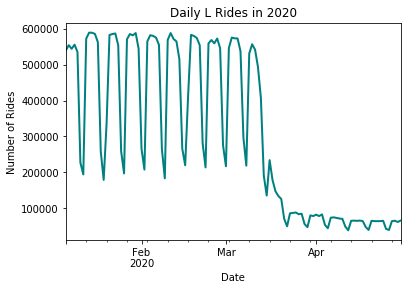

In [66]:
ax = daily_2020.plot(kind = 'line', legend = False, lw =2, color='teal')

ax.set(xlabel="Date", ylabel="Number of Rides", title = "Daily L Rides in 2020")

[Text(0, 0.5, 'Number of Rides'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Weekly L Rides in 2020')]

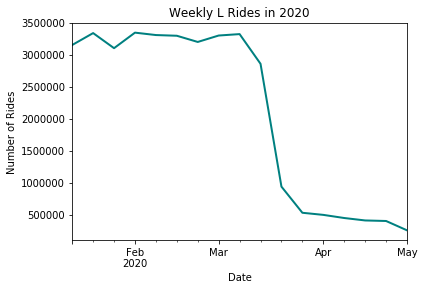

In [68]:
ax = weekly_2020.plot(kind = 'line', legend = False, lw =2, color='teal')

ax.set(xlabel="Date", ylabel="Number of Rides", title = "Weekly L Rides in 2020")

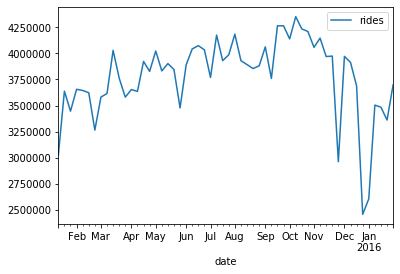

In [29]:
L_data.loc[(L_data['date']>= "01-05-2015") & (L_data['date']<= "01-31-2016")].groupby(pd.Grouper(key='date', freq='W')).agg({
    'rides': 'sum'
}).plot(kind = 'line')